# Three state economy

In [1]:
from pylab import plt
import matplotlib
plt.style.use('seaborn')

matplotlib.rcParams['figure.figsize']= (15,9)

In [2]:
import numpy as np
from numpy.random import default_rng
np.set_printoptions(precision=5, suppress=True)

In [3]:
rng = default_rng(seed=100)

In [4]:
rng

Generator(PCG64) at 0x7FBBDE85EAC0

In [5]:
rng.random(10)

array([0.83498, 0.59655, 0.28886, 0.04295, 0.97365, 0.59647, 0.79026,
       0.91034, 0.68815, 0.18999])

In [4]:
B = (10, np.array((11,11,11)))
B
# risk less bond bought at 10 and for all three states of economy it yields 11

(10, array([11, 11, 11]))

In [5]:
S = (10, np.array((20,10,5)))
S
# values for three state of economy

(10, array([20, 10,  5]))

In [6]:
n = 1000

In [7]:
b = rng.random(n)
b[:5]

array([0.83498, 0.59655, 0.28886, 0.04295, 0.97365])

In [8]:
s = rng.random(n)
s[:5]

array([0.53388, 0.98979, 0.42359, 0.27783, 0.5665 ])

In [9]:
A = [b[i]*B[1] + s[i]*S[1] for i in range(n)]
A[:5]

[array([19.86232, 14.52356, 11.85418]),
 array([26.35796, 16.46003, 11.51106]),
 array([11.64939,  7.41344,  5.29547]),
 array([6.02897, 3.25072, 1.86159]),
 array([22.04023, 16.37522, 13.54271])]

In [10]:
A = np.array(A)
A[:3]

array([[19.86232, 14.52356, 11.85418],
       [26.35796, 16.46003, 11.51106],
       [11.64939,  7.41344,  5.29547]])

In [11]:
from pylab import mpl, plt
from mpl_toolkits.mplot3d import Axes3D

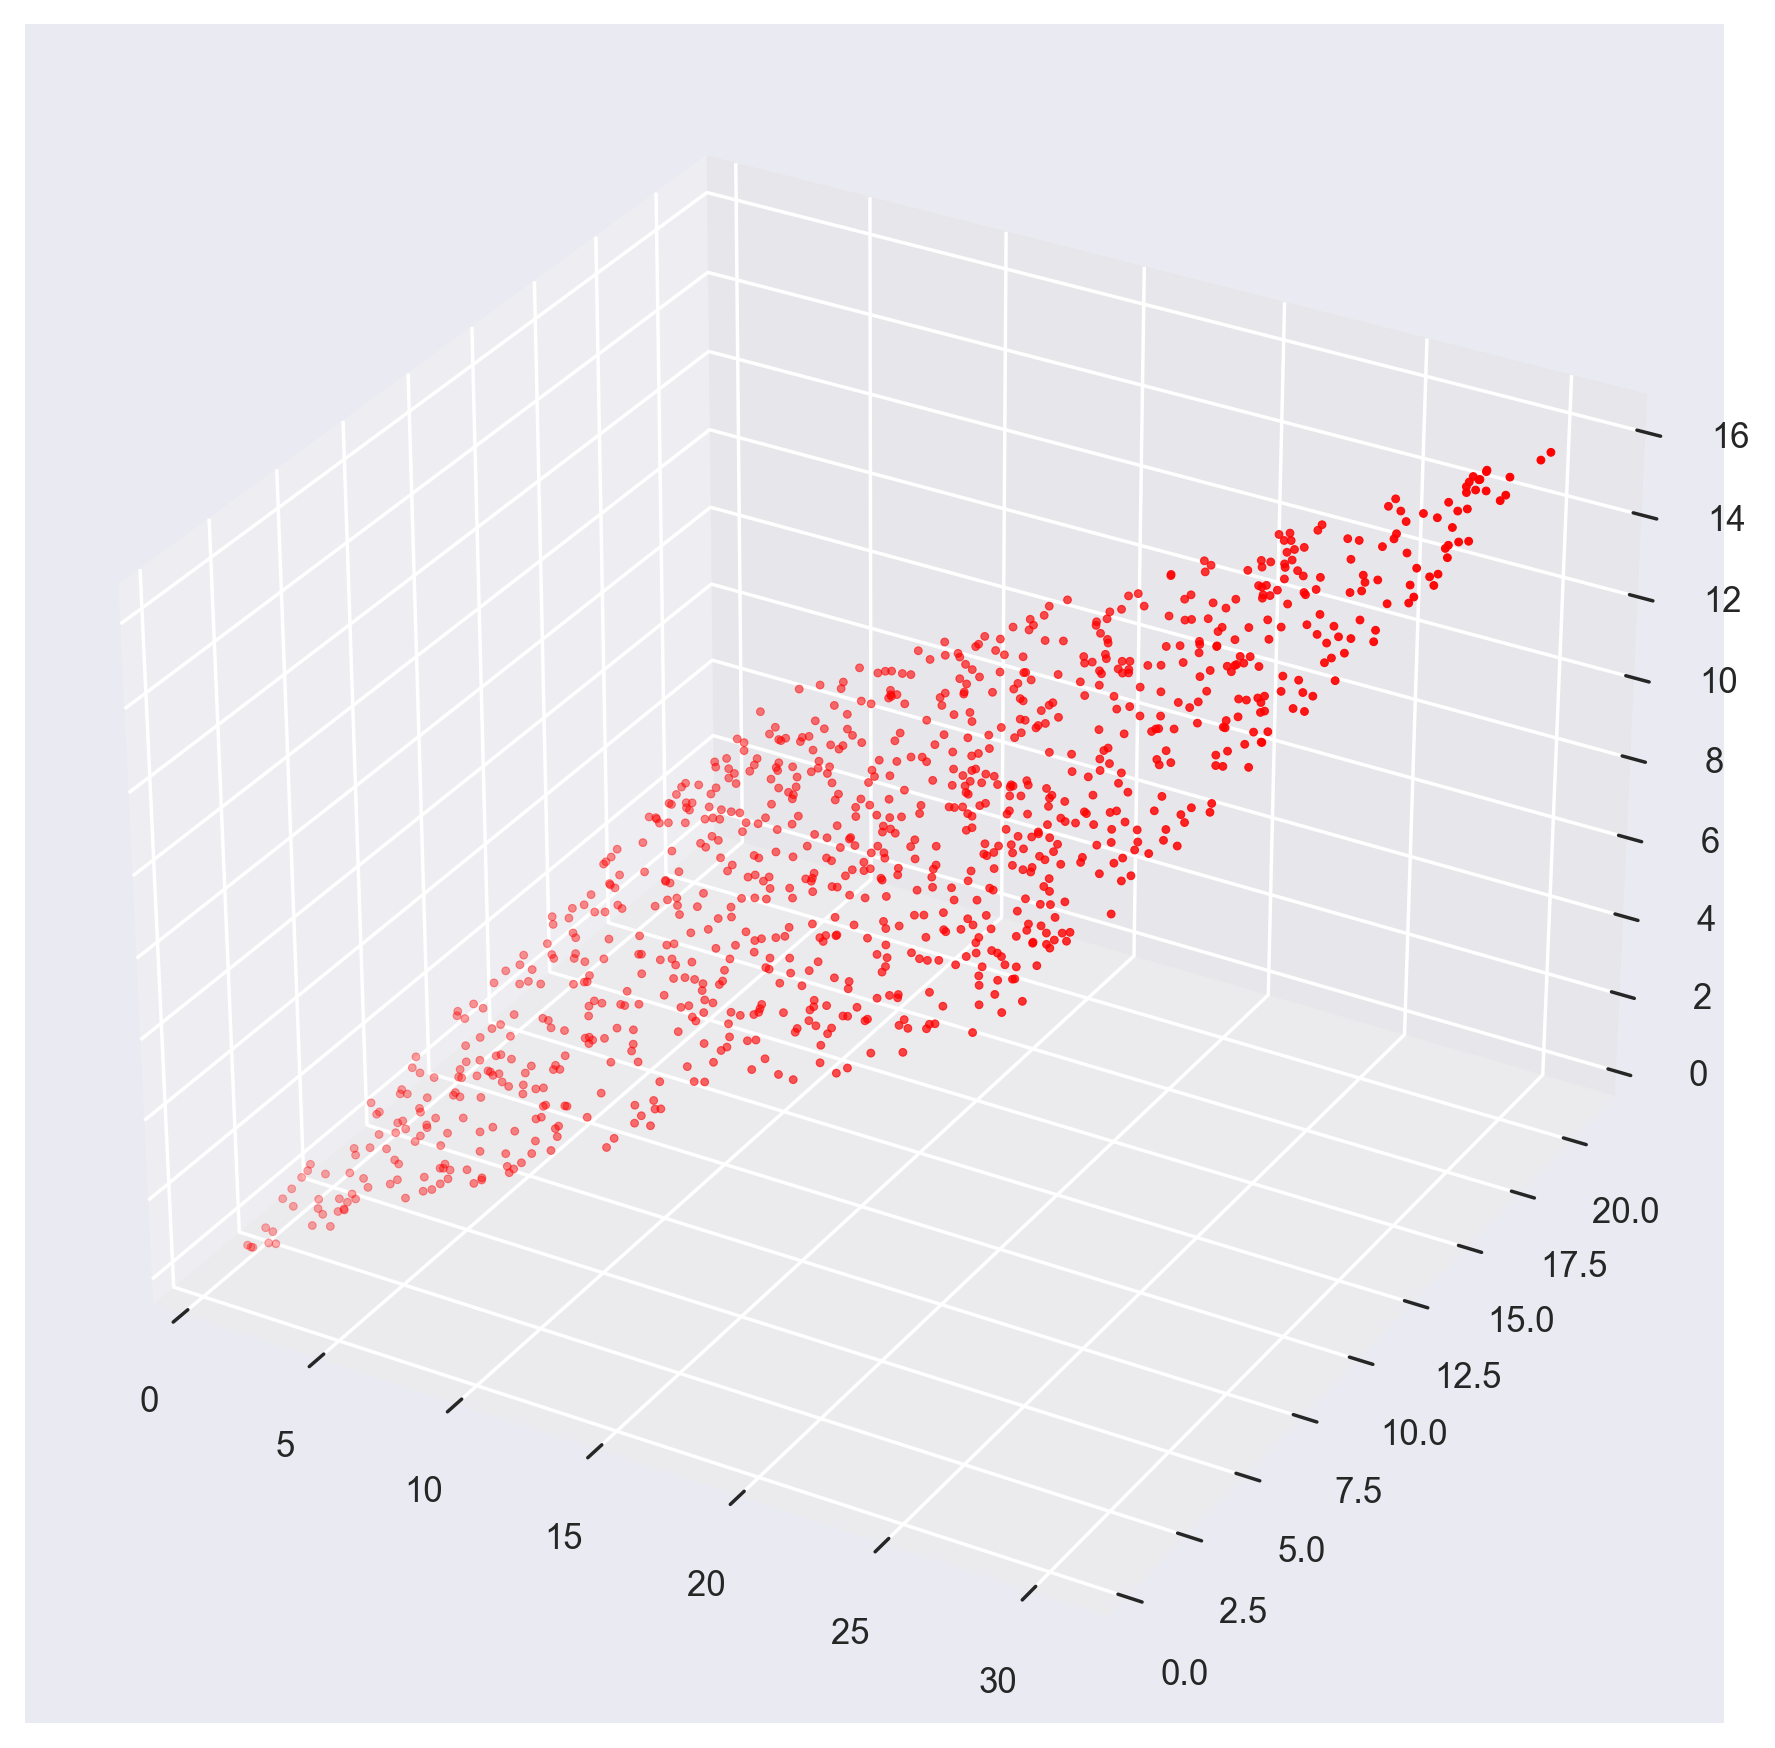

In [12]:
fig = plt.figure(figsize=(20,9), dpi = 250)
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(A[:,0], A[:,1], A[:,2], c='red', marker = '.');

# red dots indicate payoff vectors 

In [13]:
C1 = np.array((1,0,0))
# payoff of the contingent claim

In [14]:
1/B[1][0] * B[1] >= C1 
# portfolio with the bond only checked for the super replication characteristic

array([ True,  True,  True])

In [15]:
1/B[1][0] * B[1]

array([1., 1., 1.])

In [16]:
1/B[1][0] * B[0]

0.9090909090909092

In [17]:
B
# remember now what B was 
# you invest now 10 and you get 11 irrespective of market state

(10, array([11, 11, 11]))

In [18]:
def V(phi, t):
    '''calculates the value of portfolio phi today , t=0 or in t = 1 year'''
    return phi[0]*B[t] + phi[1]*S[t]

In [19]:
phi = np.array((0.04,0.03))
# random guess for the super replicating portfolio

In [20]:
V(phi,t = 0)
# the cost to set up such portfolio, which is lower than with bond only

0.7

In [21]:
V(phi,t = 1)
# resulting payoff in one year which super replicates the first arrow debreu security

array([1.04, 0.74, 0.59])

## Minimization program 

    The cose optimal super replication portfolio is much cheaper than the one using the bond only or the already more efficient portfolio ncluding the bond and the stock

In [22]:
from scipy.optimize import minimize

In [23]:
cons = ({'type':'ineq', 'fun':lambda phi : V(phi,1) - C1})

# inequality constraints in vectorized fashion

In [24]:
res = minimize(lambda phi: V(phi, 0),
               (0.01, 0.01),
               method='SLSQP',
               constraints=cons)

# The method to be used for the minimization, here Sequential Least Squares Programming (SLSQP).

In [25]:
res

     fun: 0.36363636363557533
     jac: array([10., 10.])
 message: 'Optimization terminated successfully'
    nfev: 6
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([-0.0303 ,  0.06667])

In [35]:
V(res['x'], 0)
# evaluation of optimal super replicating portfolio today

0.36363636363557533

In [27]:
V(res['x'], 1)

array([ 1.     ,  0.33333, -0.     ])

The future uncertain value of the optimal super-replicating portfolio; the optimal portfolio that sells short the bond and goes long the stock exactly replicates the relevant payoff in two states and only super-replicates in the middle state.

## Approximate Replication

    We deal with mean squared error in this(MSE). This is the quantity to be minimized. For an attainable contingent claim, the MSE is zero.

In [36]:
M = np.array((B[1], S[1])).T
M
 # The future price matrix of the two traded financial assets.

array([[11, 20],
       [11, 10],
       [11,  5]])

In [37]:
reg = np.linalg.lstsq(M, C1, rcond=-1)
reg
# rcond here deal with Cut-off ratio for small singular values of M
# This solves the linear OLS regression problem by minimizing the MSE.

# notice that the rank of such matrix here is 2 , given below by reg[2]
# reg[1] gives the MSE from optimization

(array([-0.04545,  0.07143]), array([0.07143]), 2, array([28.93836,  7.11136]))

In [38]:
V(reg[0],0)
# The value of the approximate portfolio (lower than the value of the cost- minimizing portfolio).

0.2597402597402596

In [31]:
V(reg[0],1)
# The payoff of the approximate portfolio

array([ 0.92857,  0.21429, -0.14286])

In [32]:
V(reg[0], 1) - C1
# The vector with the replication errors.

array([-0.07143,  0.21429, -0.14286])

In [39]:
np.mean((V(reg[0], 1) - C1) ** 2)
# The MSE from the approximate replication. 
# In case of exact replication , the error will be straight away zero 

0.023809523809523808

## $$ \text{Capital Market Line } $$ 

The expected rate of return for the market portfolio is as $$\mu_{S} = \frac{E^P (S_1)}{S_0} - 1 $$

In [40]:
mu_S = 7/6 - 1
mu_S
# The expected return of the market portfolio.

0.16666666666666674

In [43]:
# volatility or sigma
sigma_S = (S[1]/S[0]).std()
sigma_S
# The volatility of the returns of the market portfolio.
# Note that this calculation for the volatility is only valid since an equal probability is assumed for the three states.

0.6236095644623235

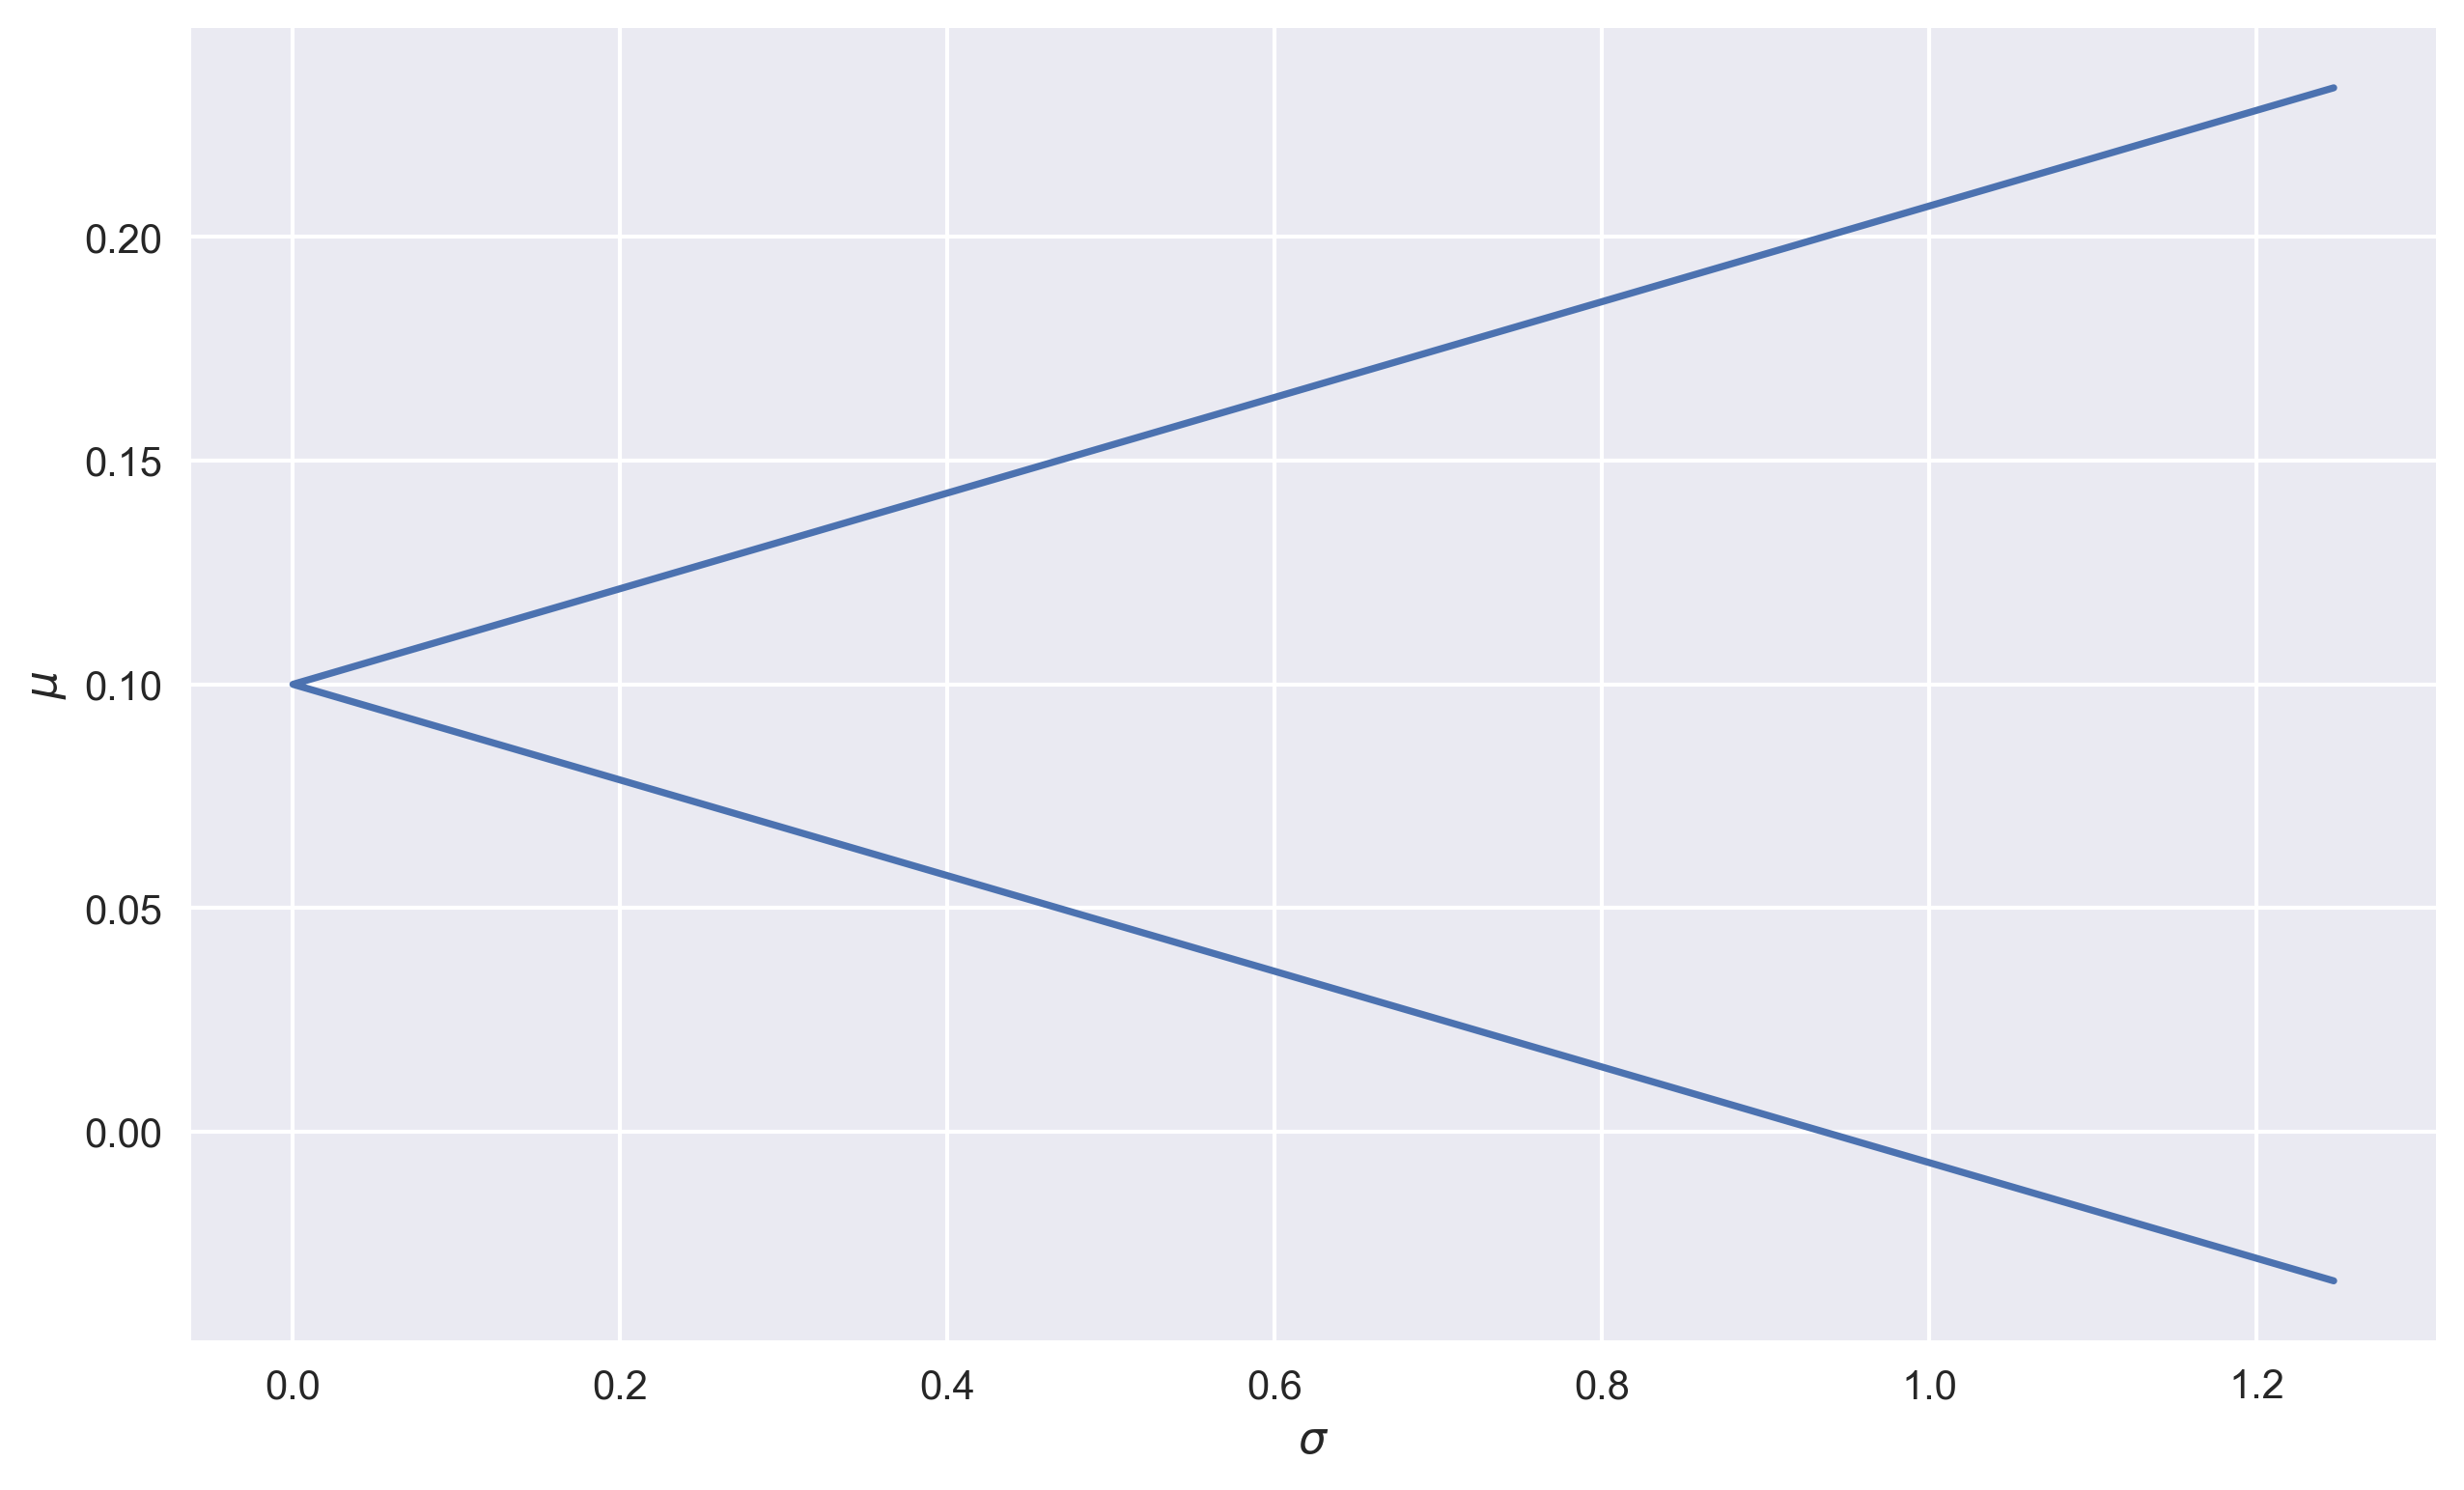

In [44]:
# Plotting capital market line 
s = np.linspace(-2,2,25)  # the bond portfolio takes up values -200% to 200% 
b = 1-s                   # bond portfolio position fills up to 100% total portfolio weight.
i = 0.1                   # The risk-less interest rate.
mu = b*i + s*mu_S         # The resulting expected rates of return for the portfolio.
sigma = np.abs(s*sigma_S) # resulting volatility values for the portfolio.

plt.figure(figsize=(10, 6), dpi = 300)
plt.plot(sigma, mu)
plt.xlabel('$\sigma$')
plt.ylabel('$\mu$');

In [45]:
num = 0.9 + 0.1/100 * 1.1
den = 99.9/100 + 0.1 + 1/10000

x = num/den
x

0.8198526066781912